# Loading n-PDFs


In [111]:
from pyalex import Works
import sys
import os

sys.path.append("../code")
from util import list_to_text_file, get_string_from_text_file

works = (
    Works()
    .filter(is_oa=True)
    .select(["open_access", "display_name"])
    .get(per_page=100, page=1)
)

In [112]:
import requests
import os

TIMEOUT = 15


# move to util?
def extract_url_to_pdf(data_dir, url: str, filename: str) -> bool:
    try:
        print(f"trying to get pdf from {url}...")
        response = requests.get(url, timeout=TIMEOUT)
        if response.status_code != 200:
            raise Exception("Request GET error. status code not 200")

        PDF_DIR = os.path.join(data_dir, "PDF")
        output_path = os.path.join(PDF_DIR, filename + ".pdf")

        with open(output_path, "wb") as f:
            f.write(response.content)
        return True
    except Exception as e:
        print(f"Could not extract pdf from url. Error: {e}")
        return False

In [113]:
def parse_n_papers_to_pdf_file(num_papers: int):
    DATA_DIR = "../unilex-transcript/data"
    output_list = get_string_from_text_file(
        os.path.join(DATA_DIR, "extraction_paper_list.txt"), full_path=True
    ).splitlines()
    exception_list = get_string_from_text_file(
        os.path.join(DATA_DIR, "extraction_paper_exception_list.txt"), full_path=True
    ).splitlines()
    output_list = [paper for paper in output_list if paper not in exception_list]
    output_cnt = len(output_list)

    added_cnt = 0
    page_idx = 0
    while output_cnt < num_papers:
        page_idx += 1
        works = (
            Works()
            .filter(is_oa=True)
            .select(["open_access", "display_name"])
            .get(per_page=100, page=page_idx)
        )
        for work in works:
            try:
                url = work["open_access"]["oa_url"]
                name = work["display_name"]
                name = name.replace(" ", "_")
                if name in exception_list:
                    continue
                if name is None:
                    raise Exception("name is NoneType")
                if name not in output_list:
                    print("")
                    if not extract_url_to_pdf(DATA_DIR, url, filename=name):
                        raise Exception("could not extract pdf from url")
                    output_list.append(name)
                    output_cnt += 1
                    added_cnt += 1
                    print(f"\n====={output_cnt} pdfs in output list=====\n")
                if output_cnt >= num_papers:
                    break
            except Exception as e:
                if name:
                    exception_list.append(name)
                print("Error msg:")
                print(e)

        list_to_text_file(
            exception_list,
            os.path.join(DATA_DIR, "extraction_paper_exception_list.txt"),
        )
        list_to_text_file(
            output_list,
            os.path.join(DATA_DIR, "extraction_paper_list.txt"),
        )

    print(f"##### FINISHED. {added_cnt} papers added to list #####")

In [114]:
parse_n_papers_to_pdf_file(200)

Error msg:
'NoneType' object has no attribute 'replace'

trying to get pdf from http://www.public.asu.edu/%7Edavidpm/classes/psy536/Baron.pdf...

=====11 pdfs in output list=====


trying to get pdf from https://europepmc.org/articles/pmc450244?pdf=render...

=====12 pdfs in output list=====


trying to get pdf from http://link.aps.org/pdf/10.1103/PhysRev.140.A1133...

=====13 pdfs in output list=====


trying to get pdf from http://www.cell.com/article/S0092867411001279/pdf...
Could not extract pdf from url. Error: Request GET error. status code not 200
Error msg:
could not extract pdf from url

trying to get pdf from https://onlinelibrary.wiley.com/doi/pdfdirect/10.3322/caac.21660...
Could not extract pdf from url. Error: Request GET error. status code not 200
Error msg:
could not extract pdf from url

trying to get pdf from https://www.jstatsoft.org/index.php/jss/article/view/v067i01/v67i01.pdf...
Could not extract pdf from url. Error: [Errno 2] No such file or directory: '../unilex

# Parse PDF to structured HTML


In [115]:
import subprocess

In [116]:
# subprocess.Popen("./pdf2html.py", cwd="/Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript")
# doesn't work (input device is not a TTY?). execute pdf2html.py directly
subprocess.run(
    "./pdf2html.py", cwd="/Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript"
)


docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/DNA_sequencing_with_chain-terminating_inhibitors /pdf/PDF/DNA_sequencing_with_chain-terminating_inhibitors.pdf DNA_sequencing_with_chain-terminating_inhibitors.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/THE_ADSORPTION_OF_GASES_ON_PLANE_SURFACES_OF_GLASS,_MICA_AND_PLATINUM. /pdf/PDF/THE_ADSORPTION_OF_GASES_ON_PLANE_SURFACES_OF_GLASS,_MICA_AND_PLATINUM..pdf THE_ADSORPTION_OF_GASES_ON_PLANE_SURFACES_OF_GLASS,_MICA_AND_PLATINUM..html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/p

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY




docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Scoping_studies:_towards_a_methodological_framework /pdf/PDF/Scoping_studies:_towards_a_methodological_framework.pdf Scoping_studies:_towards_a_methodological_framework.html
docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Highly_accurate_protein_structure_prediction_with_AlphaFold /pdf/PDF/Highly_accurate_protein_structure_prediction_with_AlphaFold.pdf Highly_accurate_protein_structure_prediction_with_AlphaFold.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-mas

sh: -c: line 0: syntax error near unexpected token `('
sh: -c: line 0: `docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/PRISMA_Extension_for_Scoping_Reviews_(PRISMA-ScR):_Checklist_and_Explanation /pdf/PDF/PRISMA_Extension_for_Scoping_Reviews_(PRISMA-ScR):_Checklist_and_Explanation.pdf PRISMA_Extension_for_Scoping_Reviews_(PRISMA-ScR):_Checklist_and_Explanation.html'
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/GRADE:_an_emerging_consensus_on_rating_quality_of_evidence_and_strength_of_recommendations /pdf/PDF/GRADE:_an_emerging_consensus_on_rating_quality_of_evidence_and_strength_of_recommendations.pdf GRADE:_an_emerging_consensus_on_rating_quality_of_evidence_and_strength_of_recommendations.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Preferred_Reporting_Items_for_Systematic_Reviews_and_Meta-Analyses:_The_PRISMA_Statement /pdf/PDF/Preferred_Reporting_Items_for_Systematic_Reviews_and_Meta-Analyses:_The_PRISMA_Statement.pdf Preferred_Reporting_Item

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/A_profile_refinement_method_for_nuclear_and_magnetic_structures /pdf/PDF/A_profile_refinement_method_for_nuclear_and_magnetic_structures.pdf A_profile_refinement_method_for_nuclear_and_magnetic_structures.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/XGBoost /pdf/PDF/XGBoost.pdf XGBoost.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Experim

sh: -c: line 0: unexpected EOF while looking for matching `''
sh: -c: line 1: syntax error: unexpected end of file
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Apoptosis:_A_Basic_Biological_Phenomenon_with_Wideranging_Implications_in_Tissue_Kinetics /pdf/PDF/Apoptosis:_A_Basic_Biological_Phenomenon_with_Wideranging_Implications_in_Tissue_Kinetics.pdf Apoptosis:_A_Basic_Biological_Phenomenon_with_Wideranging_Implications_in_Tissue_Kinetics.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Homeostasis_model_assessment:_insulin_resistance_and_?-cell_function_from_fasting_plasma_glucose_and_insulin_concentrations_in_man /pdf/PDF/Homeostasis_model_assessment:_insulin_resistance_and_?-cell_function_from_fast

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Methods_for_Dietary_Fiber,_Neutral_Detergent_Fiber,_and_Nonstarch_Polysaccharides_in_Relation_to_Animal_Nutrition /pdf/PDF/Methods_for_Dietary_Fiber,_Neutral_Detergent_Fiber,_and_Nonstarch_Polysaccharides_in_Relation_to_Animal_Nutrition.pdf Methods_for_Dietary_Fiber,_Neutral_Detergent_Fiber,_and_Nonstarch_Polysaccharides_in_Relation_to_Animal_Nutrition.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/A_pneumonia_outbreak_associated_with_a_new_coronavirus_of_probable_bat_origin /pdf/PDF/A_pneumonia_outbreak_associated_with_a_new_coronavirus_of_p

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Raman_Spectrum_of_Graphene_and_Graphene_Layers /pdf/PDF/Raman_Spectrum_of_Graphene_and_Graphene_Layers.pdf Raman_Spectrum_of_Graphene_and_Graphene_Layers.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/A_Guideline_of_Selecting_and_Reporting_Intraclass_Correlation_Coefficients_for_Reliability_Research /pdf/PDF/A_Guideline_of_Selecting_and_Reporting_Intraclass_Correlation_Coefficients_for_Reliability_Research.pdf A_Guideline_of_Selecting_and_Reporting_Intraclass_Correlation_Coefficients_for_Reliability_Research.html

docker run -ti --rm -v /User

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Self-efficacy:_Toward_a_unifying_theory_of_behavioral_change. /pdf/PDF/Self-efficacy:_Toward_a_unifying_theory_of_behavioral_change..pdf Self-efficacy:_Toward_a_unifying_theory_of_behavioral_change..html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/limma_powers_differential_expression_analyses_for_RNA-sequencing_and_microarray_studies /pdf/PDF/limma_powers_differential_expression_analyses_for_RNA-sequencing_and_microarray_studies.pdf limma_powers_differential_expression_analyses_for_RNA-sequencing_and_microarray_studies.html

docker run -ti --rm

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Moderated_estimation_of_fold_change_and_dispersion_for_RNA-seq_data_with_DESeq2 /pdf/PDF/Moderated_estimation_of_fold_change_and_dispersion_for_RNA-seq_data_with_DESeq2.pdf Moderated_estimation_of_fold_change_and_dispersion_for_RNA-seq_data_with_DESeq2.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Image-to-Image_Translation_with_Conditional_Adversarial_Networks /pdf/PDF/Image-to-Image_Translation_with_Conditional_Adversarial_Networks.pdf Image-to-Image_Translation_with_Conditional_Adversarial_Networks.html

docker run -ti --rm -v /Users/ms/c

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Self-Consistent_Equations_Including_Exchange_and_Correlation_Effects /pdf/PDF/Self-Consistent_Equations_Including_Exchange_and_Correlation_Effects.pdf Self-Consistent_Equations_Including_Exchange_and_Correlation_Effects.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Bootstrap_Methods:_Another_Look_at_the_Jackknife /pdf/PDF/Bootstrap_Methods:_Another_Look_at_the_Jackknife.pdf Bootstrap_Methods:_Another_Look_at_the_Jackknife.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htm

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/A_Contribution_to_the_Empirics_of_Economic_Growth /pdf/PDF/A_Contribution_to_the_Empirics_of_Economic_Growth.pdf A_Contribution_to_the_Empirics_of_Economic_Growth.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/The_CES-D_Scale /pdf/PDF/The_CES-D_Scale.pdf The_CES-D_Scale.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Measurements_of_Ω_and_Λ_f

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Microsoft_COCO:_Common_Objects_in_Context /pdf/PDF/Microsoft_COCO:_Common_Objects_in_Context.pdf Microsoft_COCO:_Common_Objects_in_Context.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/QUANTUM_ESPRESSO:_a_modular_and_open-source_software_project_for_quantum_simulations_of_materials /pdf/PDF/QUANTUM_ESPRESSO:_a_modular_and_open-source_software_project_for_quantum_simulations_of_materials.pdf QUANTUM_ESPRESSO:_a_modular_and_open-source_software_project_for_quantum_simulations_of_materials.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY




docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Standardisation_of_spirometry /pdf/PDF/Standardisation_of_spirometry.pdf Standardisation_of_spirometry.html
docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/A_unified_formulation_of_the_constant_temperature_molecular_dynamics_methods /pdf/PDF/A_unified_formulation_of_the_constant_temperature_molecular_dynamics_methods.pdf A_unified_formulation_of_the_constant_temperature_molecular_dynamics_methods.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ub

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/phyloseq:_An_R_Package_for_Reproducible_Interactive_Analysis_and_Graphics_of_Microbiome_Census_Data /pdf/PDF/phyloseq:_An_R_Package_for_Reproducible_Interactive_Analysis_and_Graphics_of_Microbiome_Census_Data.pdf phyloseq:_An_R_Package_for_Reproducible_Interactive_Analysis_and_Graphics_of_Microbiome_Census_Data.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Electronics_and_optoelectronics_of_two-dimensional_transition_metal_dichalcogenides /pdf/PDF/Electronics_and_optoelectronics_of_two-dimensional_transition_metal_dichalcogenides.pdf Electro

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Common_risk_factors_in_the_returns_on_stocks_and_bonds /pdf/PDF/Common_risk_factors_in_the_returns_on_stocks_and_bonds.pdf Common_risk_factors_in_the_returns_on_stocks_and_bonds.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/RAxML-VI-HPC:_maximum_likelihood-based_phylogenetic_analyses_with_thousands_of_taxa_and_mixed_models /pdf/PDF/RAxML-VI-HPC:_maximum_likelihood-based_phylogenetic_analyses_with_thousands_of_taxa_and_mixed_models.pdf RAxML-VI-HPC:_maximum_likelihood-based_phylogenetic_analyses_with_thousands_of_taxa_and_mixed_models.html

d

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/MapReduce /pdf/PDF/MapReduce.pdf MapReduce.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Fast,_scalable_generation_of_high‐quality_protein_multiple_sequence_alignments_using_Clustal_Omega /pdf/PDF/Fast,_scalable_generation_of_high‐quality_protein_multiple_sequence_alignments_using_Clustal_Omega.pdf Fast,_scalable_generation_of_high‐quality_protein_multiple_sequence_alignments_using_Clustal_Omega.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Learning_Phrase_Representations_using_RNN_Encoder–Decoder_for_Statistical_Machine_Translation /pdf/PDF/Learning_Phrase_Representations_using_RNN_Encoder–Decoder_for_Statistical_Machine_Translation.pdf Learning_Phrase_Representations_using_RNN_Encoder–Decoder_for_Statistical_Machine_Translation.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Histograms_of_Oriented_Gradients_for_Human_Detection /pdf/PDF/Histograms_of_Oriented_Gradients_for_Human_Detection.pdf Histograms_of_Oriented_Gradients_for_Human_Detection.html

docker run -ti --rm -v /User

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Cutadapt_removes_adapter_sequences_from_high-throughput_sequencing_reads /pdf/PDF/Cutadapt_removes_adapter_sequences_from_high-throughput_sequencing_reads.pdf Cutadapt_removes_adapter_sequences_from_high-throughput_sequencing_reads.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Geant4—a_simulation_toolkit /pdf/PDF/Geant4—a_simulation_toolkit.pdf Geant4—a_simulation_toolkit.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Cluster_analysis_and_display_of_genome-wide_expression_patterns /pdf/PDF/Cluster_analysis_and_display_of_genome-wide_expression_patterns.pdf Cluster_analysis_and_display_of_genome-wide_expression_patterns.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/AutoDock4_and_AutoDockTools4:_Automated_docking_with_selective_receptor_flexibility /pdf/PDF/AutoDock4_and_AutoDockTools4:_Automated_docking_with_selective_receptor_flexibility.pdf AutoDock4_and_AutoDockTools4:_Automated_docking_with_selective_receptor_flexibility.html

docker run -ti --rm -v /U

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Studies_of_interference_in_serial_verbal_reactions. /pdf/PDF/Studies_of_interference_in_serial_verbal_reactions..pdf Studies_of_interference_in_serial_verbal_reactions..html


docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Coefficient_alpha_and_the_internal_structure_of_tests /pdf/PDF/Coefficient_alpha_and_the_internal_structure_of_tests.pdf Coefficient_alpha_and_the_internal_structure_of_tests.html
docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubunt

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Initial_sequencing_and_analysis_of_the_human_genome /pdf/PDF/Initial_sequencing_and_analysis_of_the_human_genome.pdf Initial_sequencing_and_analysis_of_the_human_genome.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/High_resolution_two-dimensional_electrophoresis_of_proteins. /pdf/PDF/High_resolution_two-dimensional_electrophoresis_of_proteins..pdf High_resolution_two-dimensional_electrophoresis_of_proteins..html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Data_clustering /pdf/PDF/Data_clustering.pdf Data_clustering.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Single-layer_MoS2_transistors /pdf/PDF/Single-layer_MoS2_transistors.pdf Single-layer_MoS2_transistors.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/CLUSTAL_W:_improving_the_sensitivity_of_progressive_multiple_sequence_alignment_throu

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Delving_Deep_into_Rectifiers:_Surpassing_Human-Level_Performance_on_ImageNet_Classification /pdf/PDF/Delving_Deep_into_Rectifiers:_Surpassing_Human-Level_Performance_on_ImageNet_Classification.pdf Delving_Deep_into_Rectifiers:_Surpassing_Human-Level_Performance_on_ImageNet_Classification.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Greedy_function_approximation:_A_gradient_boosting_machine. /pdf/PDF/Greedy_function_approximation:_A_gradient_boosting_machine..pdf Greedy_function_approximation:_A_gradient_boosting_machine..html

docker run -t

sh: -c: line 0: unexpected EOF while looking for matching `''
sh: -c: line 1: syntax error: unexpected end of file
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Glutathione_S-Transferases /pdf/PDF/Glutathione_S-Transferases.pdf Glutathione_S-Transferases.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Fiji:_an_open-source_platform_for_biological-image_analysis /pdf/PDF/Fiji:_an_open-source_platform_for_biological-image_analysis.pdf Fiji:_an_open-source_platform_for_biological-image_analysis.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Adam:_A_Method_for_Stochastic_Optimization /pdf/PDF/Adam:_A_Method_for_Stochastic_Optimization.pdf Adam:_A_Method_for_Stochastic_Optimization.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Understanding_the_Warburg_Effect:_The_Metabolic_Requirements_of_Cell_Proliferation /pdf/PDF/Understanding_the_Warburg_Effect:_The_Metabolic_Requirements_of_Cell_Proliferation.pdf Understanding_the_Warburg_Effect:_The_Metabolic_Requirements_of_Cell_Proliferation.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Projector_augmented-wave_method /pdf/PDF/Projector_augmented-wave_method.pdf Projector_augmented-wave_method.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/A_comprehensive_set_of_sequence_analysis_programs_for_the_VAX /pdf/PDF/A_comprehensive_set_of_sequence_analysis_programs_for_the_VAX.pdf A_comprehensive_set_of_sequence_analysis_programs_for_the_VAX.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Intrinsic_and_Extrinsic_Motivations:_Classic_Definitions_and_New_Directions /pdf/PDF/Intrinsic_and_Extrinsic_Motivations:_Classic_Definitions_and_New_Directions.pdf Intrinsic_and_Extrinsic_Motivations:_Classic_Definitions_and_New_Directions.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Atoms,_molecules,_solids,_and_surfaces:_Applications_of_the_generalized_gradient_approximation_for_exchange_and_correlation /pdf/PDF/Atoms,_molecules,_solids,_and_surfaces:_Applications_of_the_generalized_gradient_approximation_for_exchange_and_correlation.pdf

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/The_diagnosis_of_dementia_due_to_Alzheimer's_disease:_Recommendations_from_the_National_Institute_on_Aging‐Alzheimer's_Association_workgroups_on_diagnostic_guidelines_for_Alzheimer's_disease /pdf/PDF/The_diagnosis_of_dementia_due_to_Alzheimer's_disease:_Recommendations_from_the_National_Institute_on_Aging‐Alzheimer's_Association_workgroups_on_diagnostic_guidelines_for_Alzheimer's_disease.pdf The_diagnosis_of_dementia_due_to_Alzheimer's_disease:_Recommendations_from_the_National_Institute_on_Aging‐Alzheimer's_Association_workgroups_on_diagnostic_guidelines_for_Alzheimer's_disease.html


docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x

sh: -c: line 0: unexpected EOF while looking for matching `''
sh: -c: line 1: syntax error: unexpected end of file
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Fuzzy_sets /pdf/PDF/Fuzzy_sets.pdf Fuzzy_sets.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Phosphorus_Assay_in_Column_Chromatography /pdf/PDF/Phosphorus_Assay_in_Column_Chromatography.pdf Phosphorus_Assay_in_Column_Chromatography.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/null /pdf/PDF/null.pdf null.html

docker run -ti --rm -v /Users/

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/A_theory_for_multiresolution_signal_decomposition:_the_wavelet_representation /pdf/PDF/A_theory_for_multiresolution_signal_decomposition:_the_wavelet_representation.pdf A_theory_for_multiresolution_signal_decomposition:_the_wavelet_representation.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/SSD:_Single_Shot_MultiBox_Detector /pdf/PDF/SSD:_Single_Shot_MultiBox_Detector.pdf SSD:_Single_Shot_MultiBox_Detector.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Model-based_Analysis_of_ChIP-Seq_(MACS) /pdf/PDF/Model-based_Analysis_of_ChIP-Seq_(MACS).pdf Model-based_Analysis_of_ChIP-Seq_(MACS).html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Using_thematic_analysis_in_psychology /pdf/PDF/Using_thematic_analysis_in_psychology.pdf Using_thematic_analysis_in_psychology.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir

sh: -c: line 0: syntax error near unexpected token `('
sh: -c: line 0: `docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Model-based_Analysis_of_ChIP-Seq_(MACS) /pdf/PDF/Model-based_Analysis_of_ChIP-Seq_(MACS).pdf Model-based_Analysis_of_ChIP-Seq_(MACS).html'
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Two-equation_eddy-viscosity_turbulence_models_for_engineering_applications /pdf/PDF/Two-equation_eddy-viscosity_turbulence_models_for_engineering_applications.pdf Two-equation_eddy-viscosity_turbulence_models_for_engineering_applications.html


docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Oligomerization_and_phosphorylation_of_the_Ire1p_kinase_during_intracellular_signaling_from_the_endoplasmic_reticulum_to_the_nucleus. /pdf/PDF/Oligomerization_and_phosphorylation_of_the_Ire1p_kinase_during_intracellular_signaling_from_the_endoplasmic_reticulum_t

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Observational_Evidence_from_Supernovae_for_an_Accelerating_Universe_and_a_Cosmological_Constant /pdf/PDF/Observational_Evidence_from_Supernovae_for_an_Accelerating_Universe_and_a_Cosmological_Constant.pdf Observational_Evidence_from_Supernovae_for_an_Accelerating_Universe_and_a_Cosmological_Constant.html



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/A_RATING_SCALE_FOR_DEPRESSION /pdf/PDF/A_RATING_SCALE_FOR_DEPRESSION.pdf A_RATING_SCALE_FOR_DEPRESSION.htmldocker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/BLAST+:_architecture_and_applications /pdf/PDF/BLAST+:_architecture_and_applications.pdf BLAST+:_architecture_and_applications.html


docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/The_PRISMA_Statement_for_Reporting_Systematic_Reviews_and_Meta-Analyses_of_Studies_That_Evaluate_Health_Care_Interventions:_Explanation_and_Elaboration /pdf/PDF/The_PRISMA_Statement_for_Reporting_Systematic_Reviews_and_Meta-Analyses_of_Studies_That_Evaluate_Health_Care_Interventions:_Explanation_and_Elaboration.pdf The_PRISMA_Statement_for_Reporting_Systematic_Reviews_an

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/The_Genome_Analysis_Toolkit:_A_MapReduce_framework_for_analyzing_next-generation_DNA_sequencing_data /pdf/PDF/The_Genome_Analysis_Toolkit:_A_MapReduce_framework_for_analyzing_next-generation_DNA_sequencing_data.pdf The_Genome_Analysis_Toolkit:_A_MapReduce_framework_for_analyzing_next-generation_DNA_sequencing_data.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Densely_Connected_Convolutional_Networks /pdf/PDF/Densely_Connected_Convolutional_Networks.pdf Densely_Connected_Convolutional_Networks.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/The_moderator–mediator_variable_distinction_in_social_psychological_research:_Conceptual,_strategic,_and_statistical_considerations. /pdf/PDF/The_moderator–mediator_variable_distinction_in_social_psychological_research:_Conceptual,_strategic,_and_statistical_considerations..pdf The_moderator–mediator_variable_distinction_in_social_psychological_research:_Conceptual,_strategic,_and_statistical_considerations..html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Ultrafast_and_memory-efficient_alignment_of_short_DNA_sequences_to_the_human_genome /pdf/

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/WordNet /pdf/PDF/WordNet.pdf WordNet.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/The_empirical_mode_decomposition_and_the_Hilbert_spectrum_for_nonlinear_and_non-stationary_time_series_analysis /pdf/PDF/The_empirical_mode_decomposition_and_the_Hilbert_spectrum_for_nonlinear_and_non-stationary_time_series_analysis.pdf The_empirical_mode_decomposition_and_the_Hilbert_spectrum_for_nonlinear_and_non-stationary_time_series_analysis.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/p

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Bagging_predictors /pdf/PDF/Bagging_predictors.pdf Bagging_predictors.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/DETERMINATION_OF_SERUM_PROTEINS_BY_MEANS_OF_THE_BIURET_REACTION /pdf/PDF/DETERMINATION_OF_SERUM_PROTEINS_BY_MEANS_OF_THE_BIURET_REACTION.pdf DETERMINATION_OF_SERUM_PROTEINS_BY_MEANS_OF_THE_BIURET_REACTION.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed c

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/A_new_generation_of_Ca2+_indicators_with_greatly_improved_fluorescence_properties. /pdf/PDF/A_new_generation_of_Ca2+_indicators_with_greatly_improved_fluorescence_properties..pdf A_new_generation_of_Ca2+_indicators_with_greatly_improved_fluorescence_properties..html


docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Development_of_the_Colle-Salvetti_correlation-energy_formula_into_a_functional_of_the_electron_density /pdf/PDF/Development_of_the_Colle-Salvetti_correlation-energy_formula_into_a_functional_of_the_electron_density.pdf Development_of_the_

the input device is not a TTY
sh: -c: line 0: syntax error near unexpected token `('
sh: -c: line 0: `docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Preferred_reporting_items_for_systematic_review_and_meta-analysis_protocols_(PRISMA-P)_2015_statement /pdf/PDF/Preferred_reporting_items_for_systematic_review_and_meta-analysis_protocols_(PRISMA-P)_2015_statement.pdf Preferred_reporting_items_for_systematic_review_and_meta-analysis_protocols_(PRISMA-P)_2015_statement.html'
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/BLEU /pdf/PDF/BLEU.pdf BLEU.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Can_Quantum-Mechanical_Description_of_Physical_Reality_Be_Considered_Complete? /pdf/PDF/Can_Quantum-Mechanical_Description_of_Physical_Reality_Be_Considered_Complete?.pdf Can_Quantum-Mechanical_Description_of_Physical_Reality_Be_Considered_Complete?.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embe

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/EEGLAB:_an_open_source_toolbox_for_analysis_of_single-trial_EEG_dynamics_including_independent_component_analysis /pdf/PDF/EEGLAB:_an_open_source_toolbox_for_analysis_of_single-trial_EEG_dynamics_including_independent_component_analysis.pdf EEGLAB:_an_open_source_toolbox_for_analysis_of_single-trial_EEG_dynamics_including_independent_component_analysis.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Fully_convolutional_networks_for_semantic_segmentation /pdf/PDF/Fully_convolutional_networks_for_semantic_segmentation.pdf Fully_convolutional_net

sh: -c: line 0: syntax error near unexpected token `('
sh: -c: line 0: `docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/The_Pascal_Visual_Object_Classes_(VOC)_Challenge /pdf/PDF/The_Pascal_Visual_Object_Classes_(VOC)_Challenge.pdf The_Pascal_Visual_Object_Classes_(VOC)_Challenge.html'
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/A_study_of_the_conditions_and_mechanism_of_the_diphenylamine_reaction_for_the_colorimetric_estimation_of_deoxyribonucleic_acid /pdf/PDF/A_study_of_the_conditions_and_mechanism_of_the_diphenylamine_reaction_for_the_colorimetric_estimation_of_deoxyribonucleic_acid.pdf A_study_of_the_conditions_and_mechanism_of_the_diphenylamine_reaction_for_the_colorimetric_estimation_of_deoxyribonucleic_acid.html


docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Fast_Parallel_Algorithms_for_Short-Range_Molecular_Dynamics /pdf/PDF/Fast_Parallel_Algorithms_for_Short-Ra

sh: -c: line 0: unexpected EOF while looking for matching `''
sh: -c: line 1: syntax error: unexpected end of file
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Statistical_principles_in_experimental_design. /pdf/PDF/Statistical_principles_in_experimental_design..pdf Statistical_principles_in_experimental_design..html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Differential_expression_analysis_for_sequence_count_data /pdf/PDF/Differential_expression_analysis_for_sequence_count_data.pdf Differential_expression_analysis_for_sequence_count_data.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.0

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Research_electronic_data_capture_(REDCap)—A_metadata-driven_methodology_and_workflow_process_for_providing_translational_research_informatics_support /pdf/PDF/Research_electronic_data_capture_(REDCap)—A_metadata-driven_methodology_and_workflow_process_for_providing_translational_research_informatics_support.pdf Research_electronic_data_capture_(REDCap)—A_metadata-driven_methodology_and_workflow_process_for_providing_translational_research_informatics_support.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Resilience_and_Stability_of_Ecological

sh: -c: line 0: syntax error near unexpected token `('
sh: -c: line 0: `docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Research_electronic_data_capture_(REDCap)—A_metadata-driven_methodology_and_workflow_process_for_providing_translational_research_informatics_support /pdf/PDF/Research_electronic_data_capture_(REDCap)—A_metadata-driven_methodology_and_workflow_process_for_providing_translational_research_informatics_support.pdf Research_electronic_data_capture_(REDCap)—A_metadata-driven_methodology_and_workflow_process_for_providing_translational_research_informatics_support.html'
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/RSEM:_accurate_transcript_quantification_from_RNA-Seq_data_with_or_without_a_reference_genome /pdf/PDF/RSEM:_accurate_transcript_quantification_from_RNA-Seq_data_with_or_without_a_reference_genome.pdf RSEM:_accurate_transcript_quantification_from_RNA-Seq_data_with_or_without_a_reference_genome.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/SPAdes:_A_New_Genome_Assembly_Algorithm_and_Its_Applications_to_Single-Cell_Sequencing /pdf/PDF/SPAdes:_A_New_Genome_Assembly_Algorithm_and_Its_Applications_to_Single-Cell_Sequencing.pdf SPAdes:_A_New_Genom

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Random_sample_consensus /pdf/PDF/Random_sample_consensus.pdf Random_sample_consensus.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Neural_networks_and_physical_systems_with_emergent_collective_computational_abilities. /pdf/PDF/Neural_networks_and_physical_systems_with_emergent_collective_computational_abilities..pdf Neural_networks_and_physical_systems_with_emergent_collective_computational_abilities..html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Generalized_autoregressive_conditional_heteroskedasticity /pdf/PDF/Generalized_autoregressive_conditional_heteroskedasticity.pdf Generalized_autoregressive_conditional_heteroskedasticity.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Bias_in_meta-analysis_detected_by_a_simple,_graphical_test /pdf/PDF/Bias_in_meta-analysis_detected_by_a_simple,_graphical_test.pdf Bias_in_meta-analysis_detected_by_a_simple,_graphical_test.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/A_new_criterion_for_assessing_discriminant_validity_in_variance-based_structural_equation_modeling /pdf/PDF/A_new_criterion_for_assessing_discriminant_validity_in_variance-based_structural_equation_modeling.pdf A_new_criterion_for_assessing_discriminant_validity_in_variance-based_structural_equation_modeling.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/The_Nature_of_Statistical_Learning_Theory /pdf/PDF/The_Nature_of_Statistical_Learning_Theory.pdf The_Nature_of_Statistical_Learning_Theory.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/pa

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Feature_Pyramid_Networks_for_Object_Detection /pdf/PDF/Feature_Pyramid_Networks_for_Object_Detection.pdf Feature_Pyramid_Networks_for_Object_Detection.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/A_Survey_of_Corporate_Governance /pdf/PDF/A_Survey_of_Corporate_Governance.pdf A_Survey_of_Corporate_Governance.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/WGCNA:_an_R_package_for_weighted_correlation_network_analysis /pdf/PDF/WGCNA:_an_R_package_for_weighted_correlation_network_analysis.pdf WGCNA:_an_R_package_for_weighted_correlation_network_analysis.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Focal_Loss_for_Dense_Object_Detection /pdf/PDF/Focal_Loss_for_Dense_Object_Detection.pdf Focal_Loss_for_Dense_Object_Detection.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --e

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Note_on_an_Approximation_Treatment_for_Many-Electron_Systems /pdf/PDF/Note_on_an_Approximation_Treatment_for_Many-Electron_Systems.pdf Note_on_an_Approximation_Treatment_for_Many-Electron_Systems.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Normalized_cuts_and_image_segmentation /pdf/PDF/Normalized_cuts_and_image_segmentation.pdf Normalized_cuts_and_image_segmentation.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --e

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY



docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Inhibited_Spontaneous_Emission_in_Solid-State_Physics_and_Electronics /pdf/PDF/Inhibited_Spontaneous_Emission_in_Solid-State_Physics_and_Electronics.pdf Inhibited_Spontaneous_Emission_in_Solid-State_Physics_and_Electronics.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20200820-ubuntu-20.04-x86_64 --embed-external-font 0  --process-nontext 0 --embed cfijo --dest-dir /pdf/HTML/Emergence_of_Scaling_in_Random_Networks /pdf/PDF/Emergence_of_Scaling_in_Random_Networks.pdf Emergence_of_Scaling_in_Random_Networks.html

docker run -ti --rm -v /Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data:/pdf -w /pdf pdf2htmlex/pdf2htmlex:0.18.8.rc2-master-20

the input device is not a TTY
the input device is not a TTY
the input device is not a TTY


CompletedProcess(args='./pdf2html.py', returncode=0)

In [117]:
subprocess.run(
    "./transcript.py", cwd="/Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript"
)

Loading fonts from: /path/to/truetype/fonts/
/Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data/HTML/A_Simple,_Positive_Semi-Definite,_Heteroskedasticity_and_Autocorrelation_Consistent_Covariance_Matrix/A_Simple,_Positive_Semi-Definite,_Heteroskedasticity_and_Autocorrelation_Consistent_Covariance_Matrix.html
list index out of range
Traceback (most recent call last):
  File "/Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/./transcript.py", line 427, in batch_process
    semanticize(path)
  File "/Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/./transcript.py", line 319, in semanticize
    h_levels = heading_levels(dom, dimensions)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/./transcript.py", line 276, in heading_levels
    prevalent_fs = top_stats[0][-1]
                   ~~~~~~~~~^^^
IndexError: list index out of range

/Users/ms/cs/ML/MLab/paper-extraction/unilex-transcript/data/HTML/SSD:_Sin

CompletedProcess(args='./transcript.py', returncode=0)

# Parse HTML with python


# -


# S2ORC


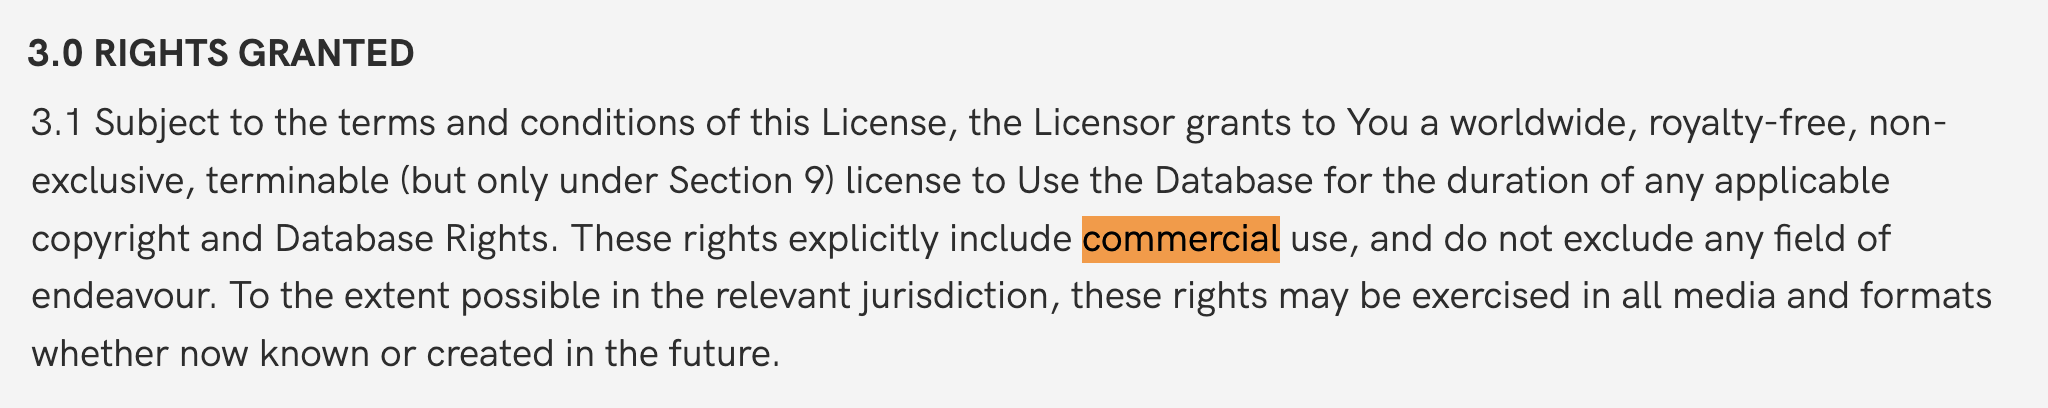


In [89]:
import json
import requests

r2 = requests.get("https://api.semanticscholar.org/datasets/v1/release/latest").json()

In [90]:
print(json.dumps(r2["datasets"][8], indent=2))
# print(r2['datasets'][0])
print(len(r2["datasets"]), "datasets \n-----")
for dataset in r2["datasets"]:
    print(dataset["name"])

{
  "name": "s2orc",
  "description": "Full-body paper text parsed from open-access PDFs. Identifies structural elements such as paragraphs, sections, and bibliography entries.\n10M records in 30 4GB files.",
  "README": "Semantic Scholar Academic Graph Datasets\n\nThe \"s2orc\" dataset contains parsed full-body text from selected papers.\n\nA subset of this data was previously released (in a different format) as S2ORC https://github.com/allenai/s2orc\n\nThe body text is parsed from PDF documents using Grobid, documented at https://grobid.readthedocs.io.\nIts output is converted from XML into a single string with a set of annotation spans.\n\nSCHEMA\n - externalIds: IDs of this paper in different catalogs\n - content:\n   - source:\n\t   - pdfUrls: URLs to the PDF\n\t   - oaInfo: license/url/status information from Unpaywall\n   - text: Full body text as a single string\n   - annotations: Annotated spans of the full body text\n\n\nLICENSE\nThis collection is licensed under ODC-BY. (htt

In [91]:
api_key = "zMWumEOE7D2ivMOlxbFO07bNBTf1W7m36cQvJWkN"
headers = {"x-api-key": api_key}
r3 = requests.get(
    "https://api.semanticscholar.org/datasets/v1/release/latest/dataset/s2orc",
    headers=headers,
).json()

In [92]:
print(r3)
print(len(r3["files"]))
r3["files"][0]
print(r3["README"])

{'name': 's2orc', 'description': 'Full-body paper text parsed from open-access PDFs. Identifies structural elements such as paragraphs, sections, and bibliography entries.\n10M records in 30 4GB files.', 'README': 'Semantic Scholar Academic Graph Datasets\n\nThe "s2orc" dataset contains parsed full-body text from selected papers.\n\nA subset of this data was previously released (in a different format) as S2ORC https://github.com/allenai/s2orc\n\nThe body text is parsed from PDF documents using Grobid, documented at https://grobid.readthedocs.io.\nIts output is converted from XML into a single string with a set of annotation spans.\n\nSCHEMA\n - externalIds: IDs of this paper in different catalogs\n - content:\n   - source:\n\t   - pdfUrls: URLs to the PDF\n\t   - oaInfo: license/url/status information from Unpaywall\n   - text: Full body text as a single string\n   - annotations: Annotated spans of the full body text\n\n\nLICENSE\nThis collection is licensed under ODC-BY. (https://open

In [1]:
import json

# import pandas as pd

filepath = "/Users/ms/Documents/MLab관련/20240308_122002_00099_nphc9_0082a3d9-cadf-449e-853c-1bdbddef95e8"

# f = open(filepath, encoding="UTF-8")
# raw_data = json.loads(f.read())
# df = pd.read_json(filepath, lines=True)

# json.loads(filepath)


with open(filepath, "r") as json_file:
    json_list = list(json_file)

results = []
for json_str in json_list:
    result = json.loads(json_str)
    # print(f"result: {result}")
    # print(isinstance(result, dict))
    results.append(result)

In [95]:
print(f"{len(results)} papers")

50514 papers


In [2]:
results[0]

{'corpusid': 237342131,
 'externalids': {'arxiv': None,
  'mag': None,
  'acl': None,
  'pubmed': '34449462',
  'pubmedcentral': '8389965',
  'dblp': None,
  'doi': '10.1097/md.0000000000026967'},
 'content': {'source': {'pdfurls': None,
   'pdfsha': '2bc9d9d3f3c034393f524b0261ed673789f2b55e',
   'oainfo': {'license': 'CCBY',
    'openaccessurl': 'https://doi.org/10.1097/md.0000000000026967',
    'status': 'GOLD'}},
  'text': "\nThe cognitive dysfunction related to Alzheimer disease or cerebral small vessel disease What's the differences\n\n\nMDZhenhong Liang \nMD a ,Lijuan Wu \nMDShumei Gong \nMDXiaohong Liu \nThe cognitive dysfunction related to Alzheimer disease or cerebral small vessel disease What's the differences\n10.1097/MD.0000000000026967Alzheimer diseasecerebral small vessel diseasecognitive dysfunctionrisk\nAlzheimer disease (AD) and sporadic cerebral small vessel disease (CSVD) are common cognitive disorders. Both AD and CSVD have mental symptoms including chronic progress

In [12]:
info = results[0]["content"]
full_text = info["text"]
ann = info["annotations"]

In [27]:
abstract = json.loads(ann["abstract"])
title = json.loads(ann["title"])
section_headers = json.loads(ann["sectionheader"])
par = json.loads(ann["paragraph"])

In [33]:
section_headers

[{'start': '2354', 'end': '2366', 'attributes': {'n': '1.'}},
 {'start': '6672', 'end': '6679', 'attributes': {'n': '2.'}},
 {'start': '6682', 'end': '6703', 'attributes': {'n': '2.1.'}},
 {'start': '6884', 'end': '6896', 'attributes': {'n': '2.2.'}},
 {'start': '7932', 'end': '7948', 'attributes': {'n': '2.3.'}},
 {'start': '8501', 'end': '8530', 'attributes': {'n': '2.4.'}},
 {'start': '11117', 'end': '11137', 'attributes': {'n': '2.5.'}},
 {'start': '11789', 'end': '11796', 'attributes': {'n': '3.'}},
 {'start': '11799', 'end': '11843', 'attributes': {'n': '3.1.'}},
 {'start': '12228', 'end': '12247', 'attributes': {'n': '3.2.'}},
 {'start': '12628', 'end': '12647', 'attributes': {'n': '3.3.'}},
 {'start': '13044', 'end': '13098', 'attributes': {'n': '3.4.'}},
 {'start': '13392', 'end': '13448', 'attributes': {'n': '3.5.'}},
 {'start': '13750', 'end': '13760', 'attributes': {'n': '4.'}},
 {'start': '17300', 'end': '17305'},
 {'start': '17308', 'end': '17313'},
 {'start': '20622', 'e

In [46]:
idx = 0
s = int(section_headers[idx]["start"])
e = int(section_headers[idx]["end"])
full_text[s:e]

'Introduction'

In [83]:
# info = results[1]['content']['annotations']['sectionheader']
# print(info)

for i in range(10):
    info = results[i]["content"]["annotations"]["sectionheader"]
    lll = []
    info = json.loads(info)
    # print(info)
    for sec in info:
        if "attributes" in sec:
            lll.append(sec["attributes"])
        else:
            lll.append("NO ATTRIBUTE")
            continue
    print(lll)

[{'n': '1.'}, {'n': '2.'}, {'n': '2.1.'}, {'n': '2.2.'}, {'n': '2.3.'}, {'n': '2.4.'}, {'n': '2.5.'}, {'n': '3.'}, {'n': '3.1.'}, {'n': '3.2.'}, {'n': '3.3.'}, {'n': '3.4.'}, {'n': '3.5.'}, {'n': '4.'}, 'NO ATTRIBUTE', 'NO ATTRIBUTE', {'n': '5.'}, 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE']
[{'n': '1.'}, {'n': '2.'}, 'NO ATTRIBUTE', {'n': '3.'}, {'n': '3.1'}, {'n': '3.2'}, {'n': '3.3'}, {'n': '3.4'}, {'n': '4.'}, {'n': '5.'}, 'NO ATTRIBUTE', {'n': '5.1'}, 'NO ATTRIBUTE', {'n': '6.'}, 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE']
['NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE', 'NO ATTRIBUTE']
[{'n': '1.'}, 'NO ATTRIBUTE', {'n': '2.'}, {'n': '2.1.'}, {'n': '2.2.'}, {'n': '2.3.'}, {'n': '3.'}, {'n': '3.1.'}, {'n': '3.2.'}, {'n': '3.3.'}, {'n': '3.4.'}, {'n': '3.5.'}, {'n': '4.'

# -


In [109]:
Works().filter(is_oa=True).count()

53858599